In [1]:
import pathlib
import matplotlib as mpl
import pandas as pd
import scanpy as sc
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

sns.set_style("ticks")

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0.2,
    "transparent": True,
}

mpl.rc("savefig", dpi=300)
output_dir = "/home/michaelswift/repos/tabula-bursa/analysis/figures/figure2ED"

pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)

# Define the subtype output directory and make sure it exists
subtypes = "../../../data/annotation"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
sc.settings.figdir = output_dir
output_suffix = ""
output_formats = [".png", ".svg", ".pdf"]

def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)
%run ../helper.py

## Load the Data

In [5]:
celltype_file = "bcells"
celltypes = ['myeloding']

In [3]:
adata = sc.read_h5ad(
    f"../../../data/{celltype_file}.h5ad.gz", backed = 'r'
)

In [6]:
nb = adata[~adata.obs.celltypist.isin(celltypes)]

In [8]:
adata = nb.to_memory()

In [9]:
#adata = adata[adata.obs.probable_hq_single_b_cell == "True"]

In [10]:
adata.obs['hypermutated'] = adata.obs.v_mismatch > 3

In [11]:
adata.obs.hypermutated = adata.obs.hypermutated.astype('category')

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/michaelswift/miniconda3/envs/scanpy_new/li

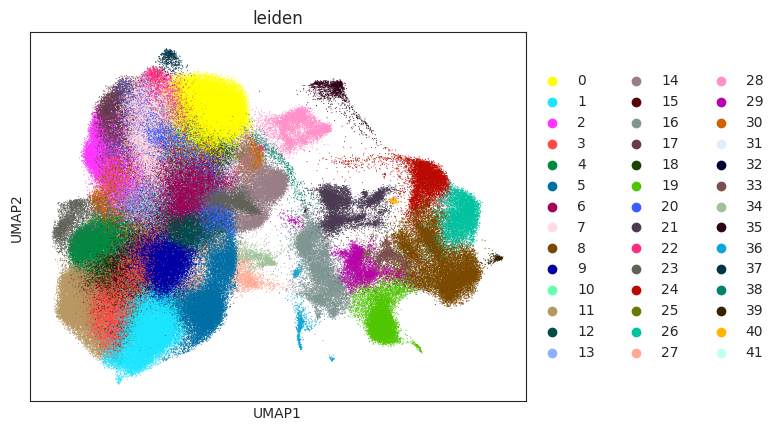

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/tools/_

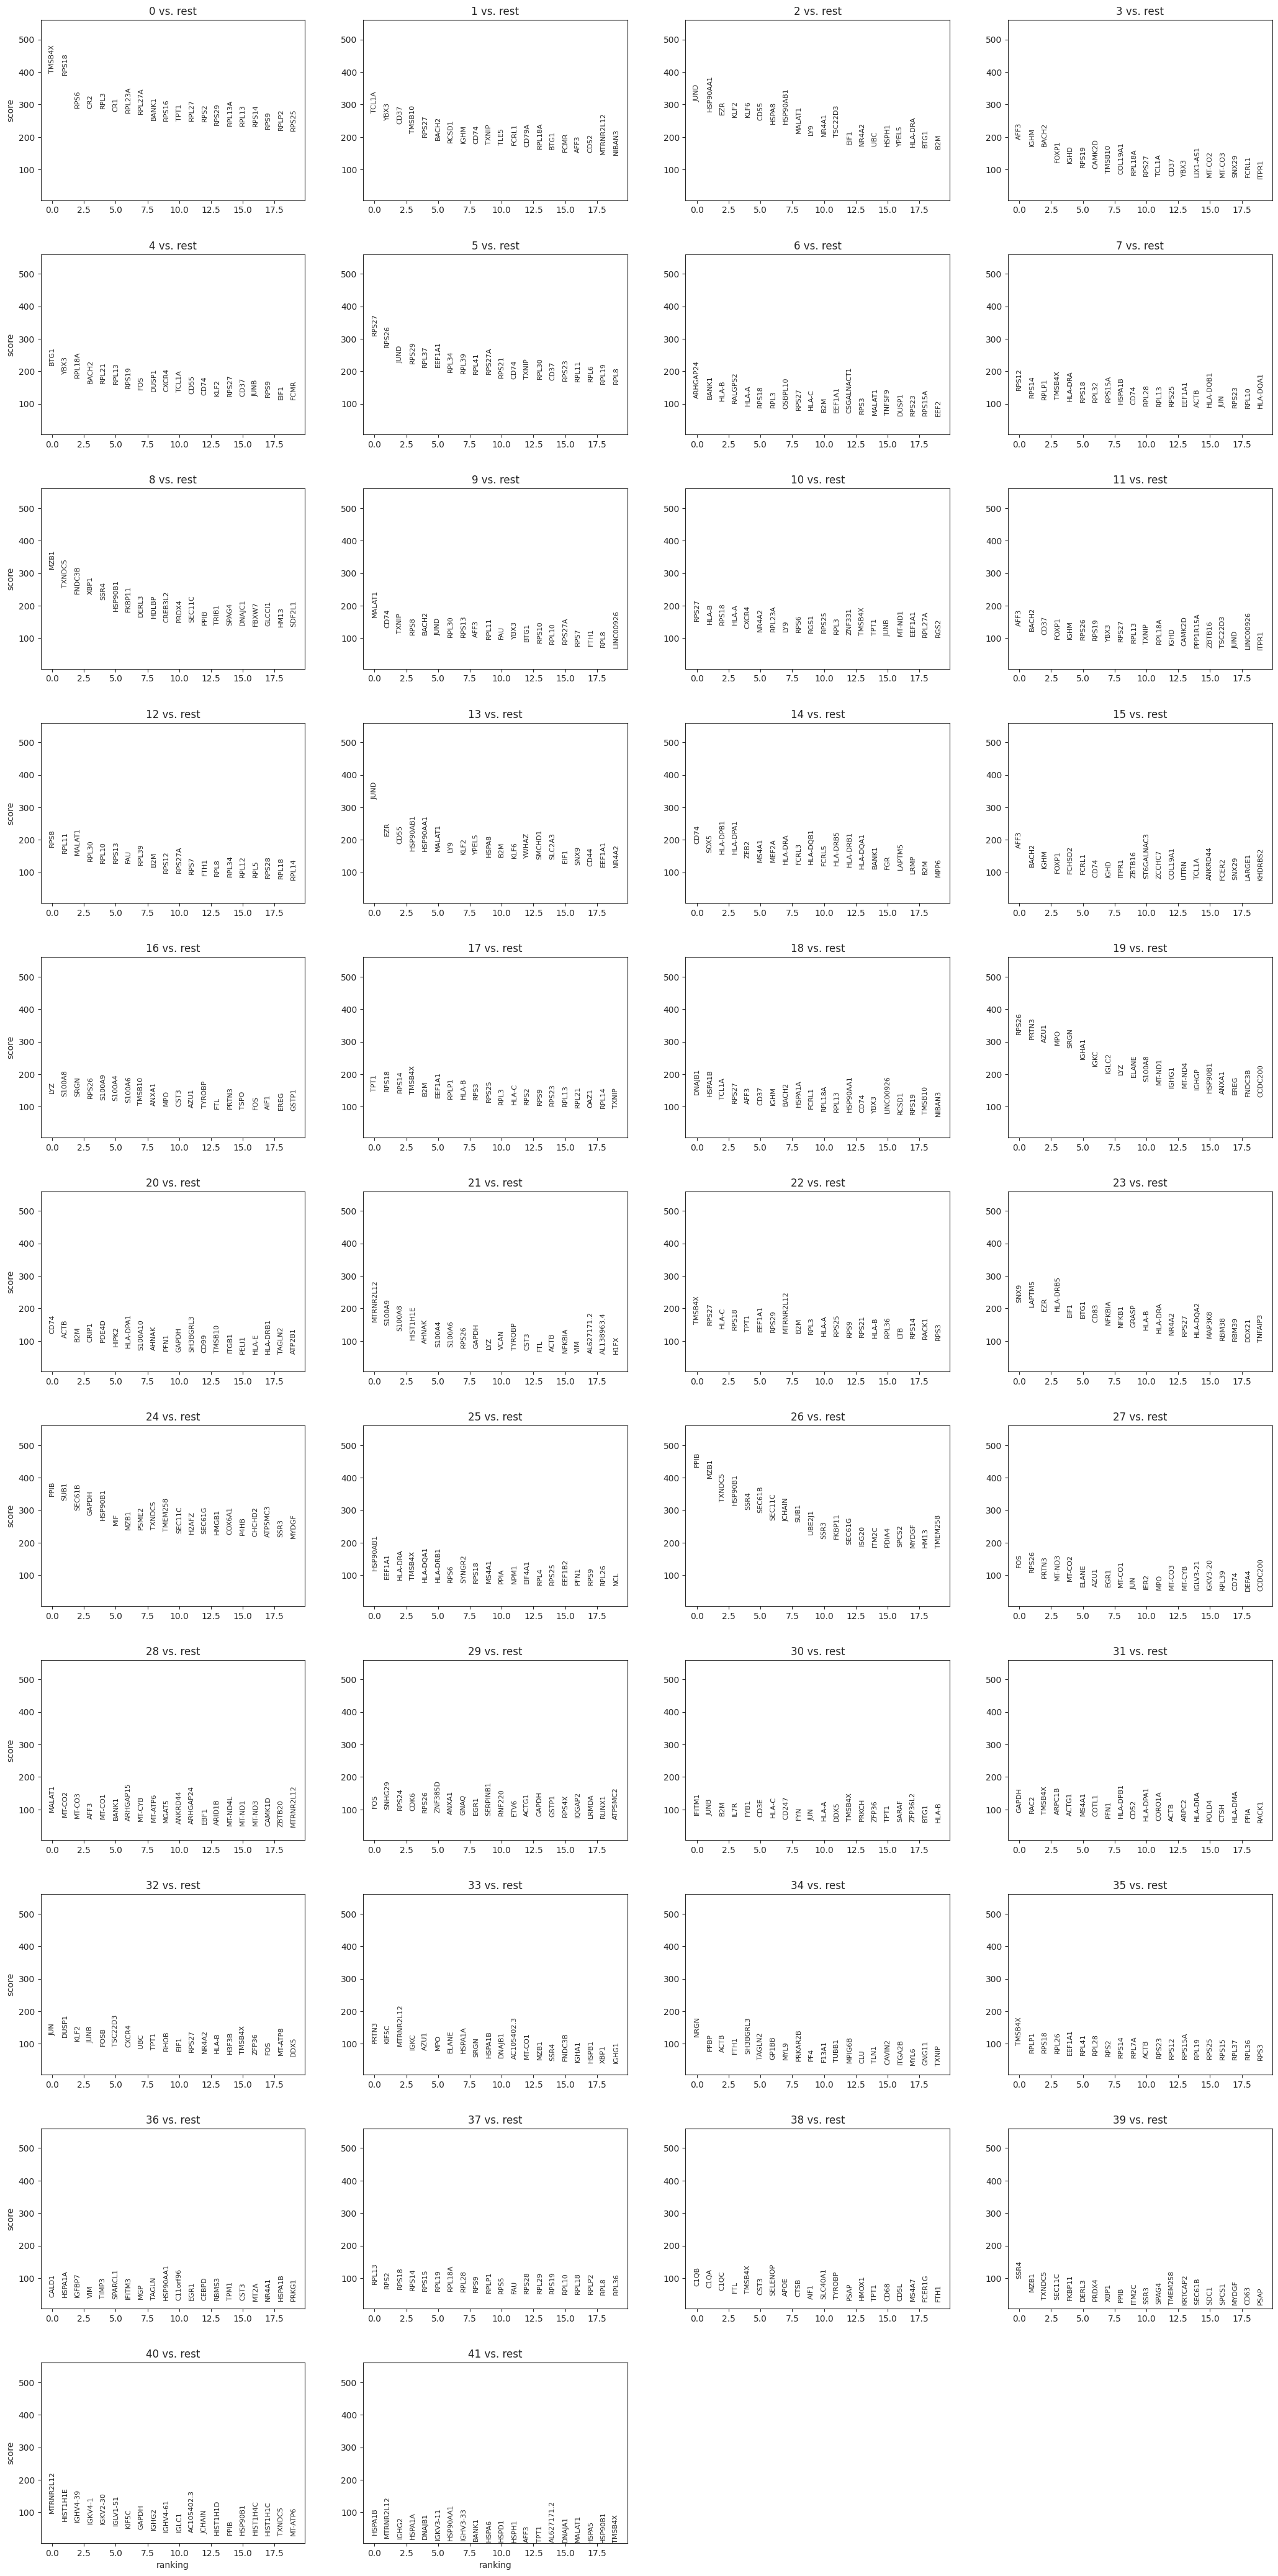

In [12]:
sc.pp.neighbors(adata, use_rep="X_scVI_all", n_neighbors=40)
sc.tl.umap(
    adata,
)
sc.tl.leiden(adata, resolution = 2)
sc.pl.umap(adata, color = 'leiden', size = 2)
sc.tl.rank_genes_groups(adata, groupby="leiden")
sc.pl.rank_genes_groups(adata)

In [67]:
adata.obs.groupby(['donor', 'lineage_id']).size() > 5

donor  lineage_id
TBd1   61.0           True
       84.0           True
       89.0           True
       92.0           True
       105.0         False
                     ...  
TBd6   233319.0      False
       233320.0      False
       233321.0      False
       233327.0      False
       233328.0      False
Length: 738672, dtype: bool

In [16]:
adata.obs['subtype'] = adata.obs['leiden']
adata.obs[['leiden', 'celltypist']].to_csv(f"{subtypes}/joint_subtypes.tab",sep = '\t')

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


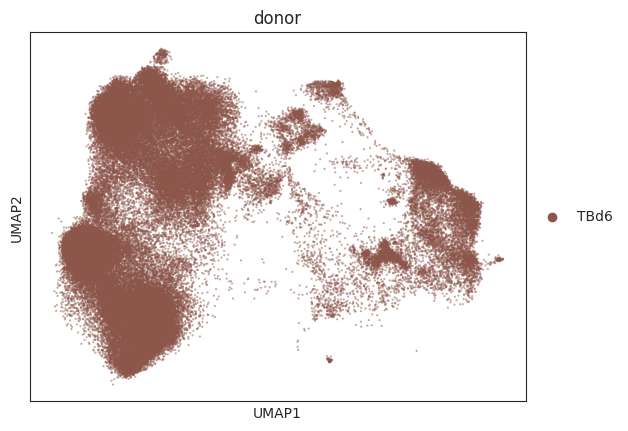

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


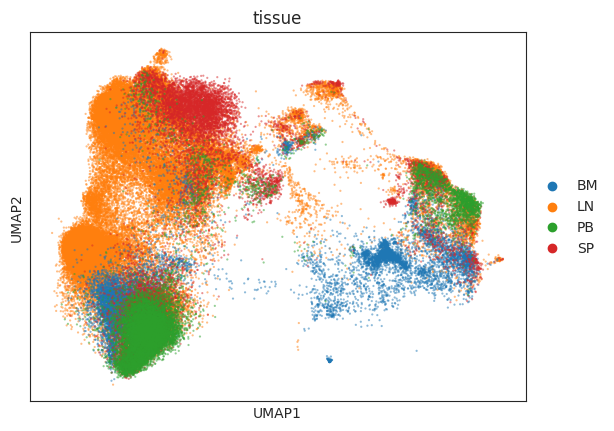

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


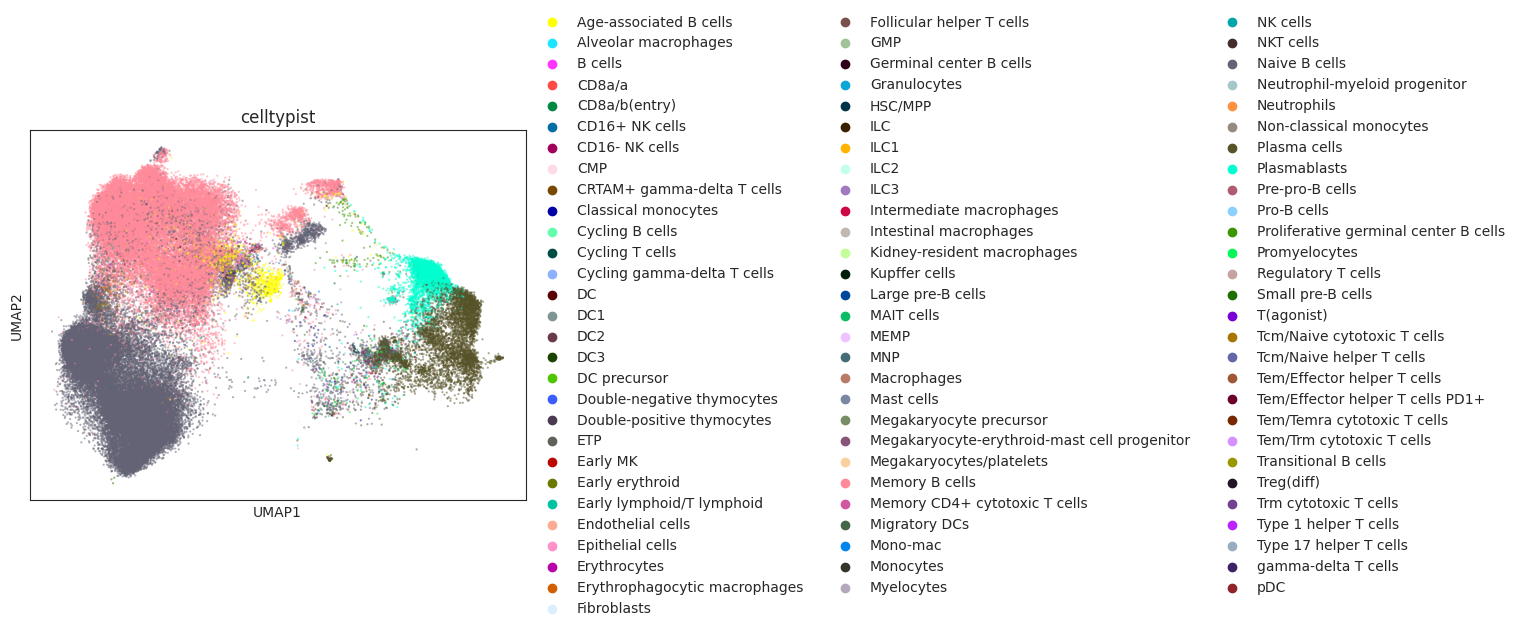

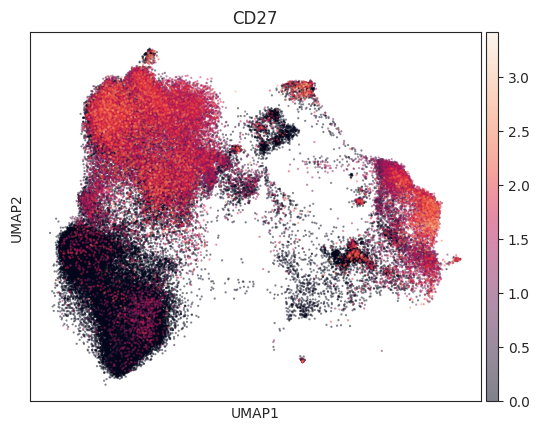

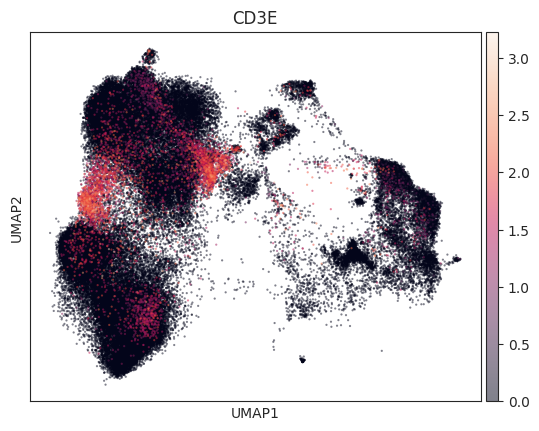

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


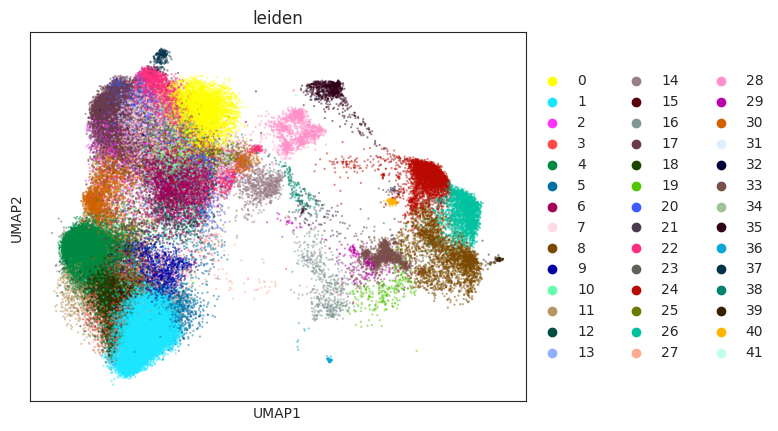

In [38]:
tbd6 = adata[adata.obs.donor == 'TBd6']
sc.pl.umap(tbd6, color = 'donor', size = 10, alpha = 0.5)
sc.pl.umap(tbd6, color = 'tissue', size = 10, alpha = 0.5)
sc.pl.umap(tbd6, color = 'celltypist', size = 10, alpha = 0.5)
sc.pl.umap(tbd6, color = 'CD27', size = 10, alpha = 0.5)
sc.pl.umap(tbd6, color = 'CD3E', size = 10, alpha = 0.5)
sc.pl.umap(tbd6, color = 'leiden', size = 10, alpha = 0.5)

In [132]:
tbd6_naive_lineages = ["705.0", "414.0",
"518.0",
"407.0",
"336.0",
"328.0"]

In [133]:
large_lineages = tbd6.obs.groupby(['lineage_id']).size() > 5
large_lineages = large_lineages[large_lineages].index

In [134]:
naive_lineages = []
for lin in large_lineages:
    df = tbd6.obs[tbd6.obs.lineage_id == lin]
    print("lineage:", lin)
    print('celltypist Labels')
    proportion = df.Immune_All_Low_predicted_labels.value_counts(normalize=True)[:]
    print(proportion.loc['Naive B cells'])
    print("\n\n")
    if proportion.loc['Naive B cells'] > 0.5:
        naive_lineages.append(lin)
    #print("leiden cluster membership")
    #print(df.leiden.value_counts(normalize = True)[:5])
    #print("---------------------------------")
    #print('\n')
    #print('\n')

lineage: 193.0
celltypist Labels
0.09734513274336283



lineage: 206.0
celltypist Labels
0.040697674418604654



lineage: 221.0
celltypist Labels
0.014492753623188406



lineage: 223.0
celltypist Labels
0.034482758620689655



lineage: 230.0
celltypist Labels
0.3010752688172043



lineage: 244.0
celltypist Labels
0.02



lineage: 246.0
celltypist Labels
0.011904761904761904



lineage: 248.0
celltypist Labels
0.046875



lineage: 253.0
celltypist Labels
0.23863636363636365



lineage: 256.0
celltypist Labels
0.029411764705882353



lineage: 260.0
celltypist Labels
0.8333333333333334



lineage: 269.0
celltypist Labels
0.13559322033898305



lineage: 275.0
celltypist Labels
0.20408163265306123



lineage: 283.0
celltypist Labels
0.0



lineage: 285.0
celltypist Labels
0.7258064516129032



lineage: 293.0
celltypist Labels
0.009708737864077669



lineage: 303.0
celltypist Labels
0.02857142857142857



lineage: 307.0
celltypist Labels
0.7540983606557377



lineage: 311.0
celltypist Labels

In [135]:

print(len(naive_lineages) / len(large_lineages), "fraction of large lineages which are more than 1/2 naive")

0.36231884057971014 fraction of large lineages which are more than 1/2 naive


In [136]:
tbd6_naive = tbd6[tbd6.obs.celltypist == 'Naive B cells']

In [137]:
tbd6_naive.obs.loc[:,'in_lin'] = tbd6_naive.obs.lineage_id.isin(naive_lineages).astype(str)

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/pandas/core/indexing.py:1761: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obj[key] = value


In [140]:
sc.pp.neighbors(tbd6_naive, use_rep='X_scVI_all')
sc.tl.umap(tbd6_naive)
sc.tl.leiden(tbd6_naive, resolution = 0.7)

In [146]:
tbd6_naive.obs.groupby('in_lin').leiden.value_counts()

in_lin  leiden
False   0         17052
        1         11761
        2          8764
        3          5680
        4          1487
        5          1421
        6           884
        7           792
        8           608
        9           113
True    0           456
        1           446
        2           287
        3           128
        6            59
        4            51
        5            38
        8            22
        7            14
        9             4
Name: count, dtype: int64

In [166]:
for lineage in naive_lineages:
    print(tbd6_naive.obs[tbd6_naive.obs.lineage_id == lineage].leiden.value_counts(normalize = True))

leiden
1    0.34
0    0.28
2    0.24
4    0.06
3    0.02
6    0.02
8    0.02
9    0.02
5    0.00
7    0.00
Name: proportion, dtype: float64
leiden
1    0.288889
0    0.266667
2    0.266667
3    0.111111
4    0.022222
5    0.022222
8    0.022222
6    0.000000
7    0.000000
9    0.000000
Name: proportion, dtype: float64
leiden
1    0.413043
0    0.304348
2    0.130435
3    0.065217
4    0.021739
5    0.021739
7    0.021739
8    0.021739
6    0.000000
9    0.000000
Name: proportion, dtype: float64
leiden
1    0.375000
0    0.291667
2    0.291667
4    0.041667
3    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: proportion, dtype: float64
leiden
0    0.36
1    0.36
2    0.08
4    0.08
5    0.08
7    0.04
3    0.00
6    0.00
8    0.00
9    0.00
Name: proportion, dtype: float64
leiden
1    0.405405
2    0.270270
0    0.216216
3    0.054054
4    0.027027
5    0.027027
6    0.000000
7    0.000000
8    0.000000
9    0.000000
Name: proportion, dtype: float64


/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


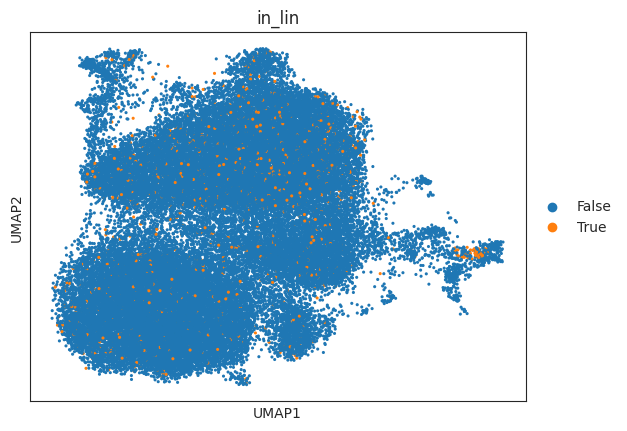

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


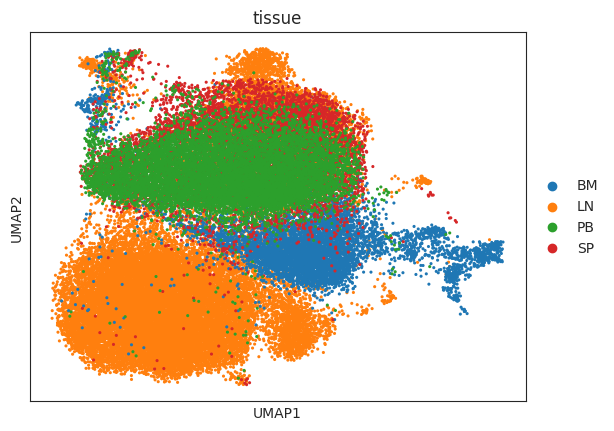

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


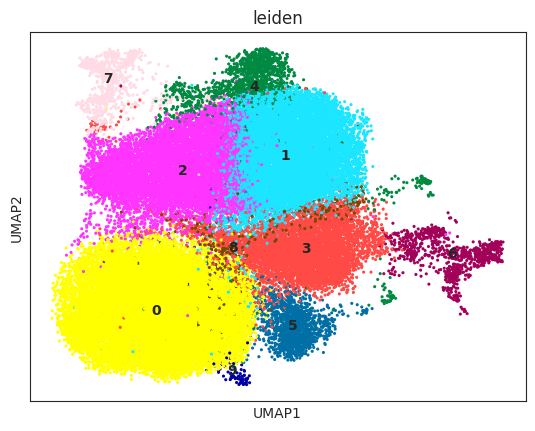

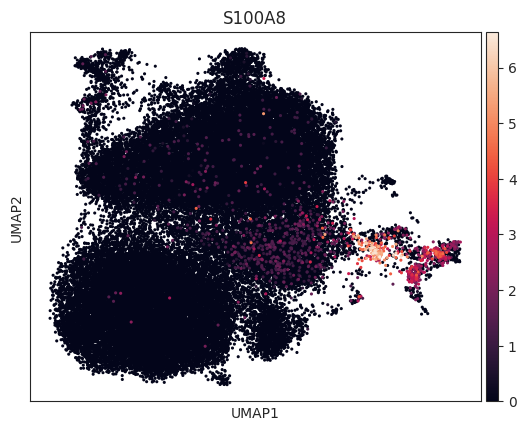

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


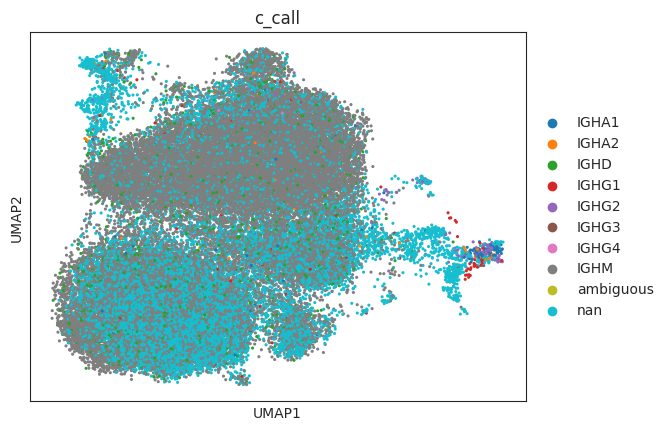

In [167]:

sc.pl.umap(tbd6_naive, color = 'in_lin', size = 20)

sc.pl.umap(tbd6_naive, color = 'tissue', size = 20)
sc.pl.umap(tbd6_naive, color = 'leiden', size = 20, legend_loc="on data" )

sc.pl.umap(tbd6_naive, color = 'S100A8', size = 20)


sc.pl.umap(tbd6_naive, color = 'c_call', size = 20)



In [170]:
tbd6.obs.groupby("sample_uid").c_call.value_counts(normalize=True)

sample_uid            c_call   
TBd6_fresh_BM         nan          0.468085
                      IGHM         0.248105
                      IGHA1        0.094147
                      IGHG2        0.066752
                      IGHG1        0.061182
                                     ...   
TBd6_frozen_SDLN2_HT  IGHG3        0.006477
                      IGHG4        0.000545
                      ambiguous    0.000061
                      IGHE         0.000000
                      IGKC         0.000000
Name: proportion, Length: 84, dtype: float64

In [147]:
sc.tl.rank_genes_groups(tbd6_naive, groupby='in_lin')

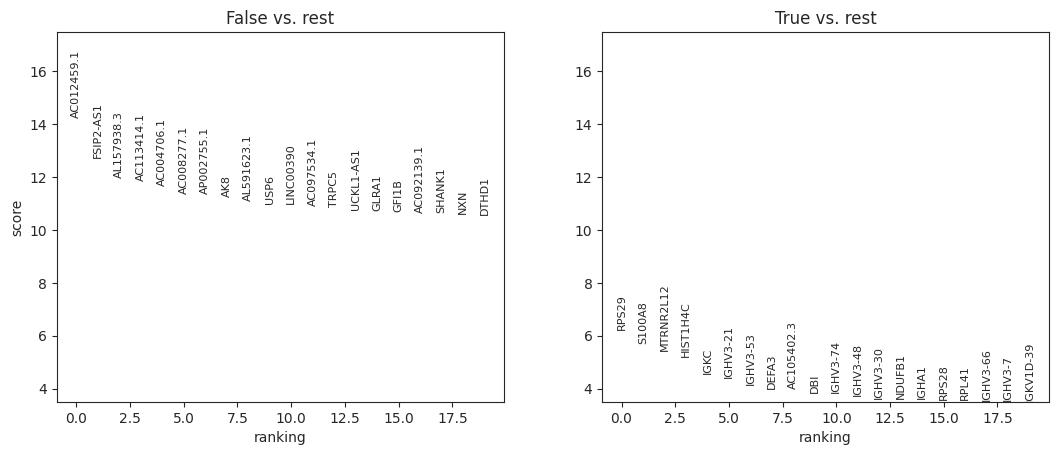

In [148]:
sc.pl.rank_genes_groups(tbd6_naive)

In [31]:
leiden_colors = dict(zip(adata.uns['leiden_colors'], adata.obs.leiden.unique().sort_values()))

celltypist_colors = dict(zip(adata.obs.celltypist.unique().sort_values(), adata.uns['celltypist_colors']))

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


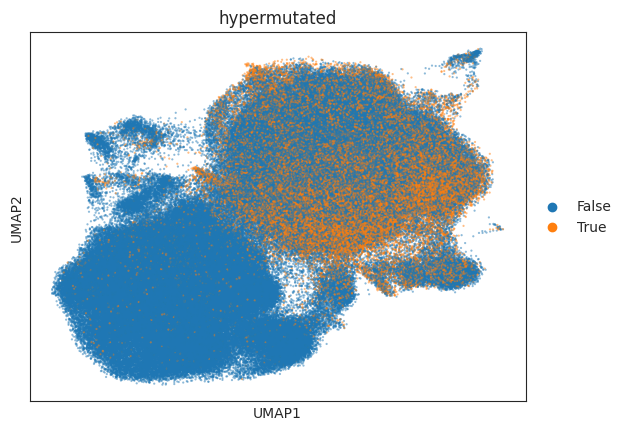

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


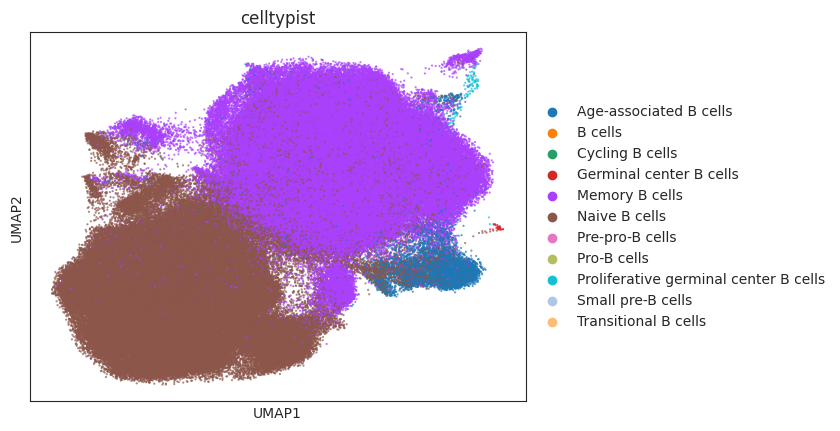

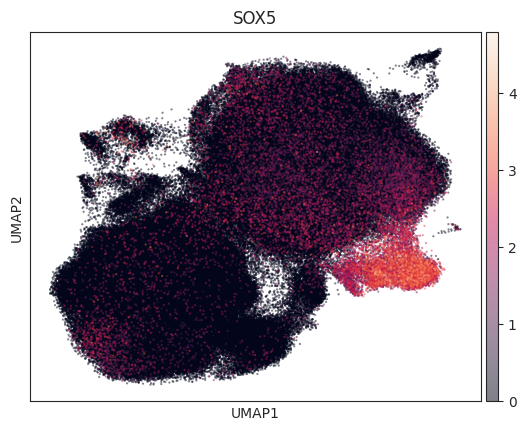

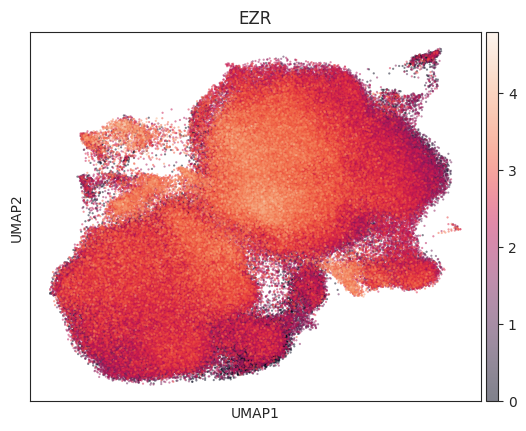

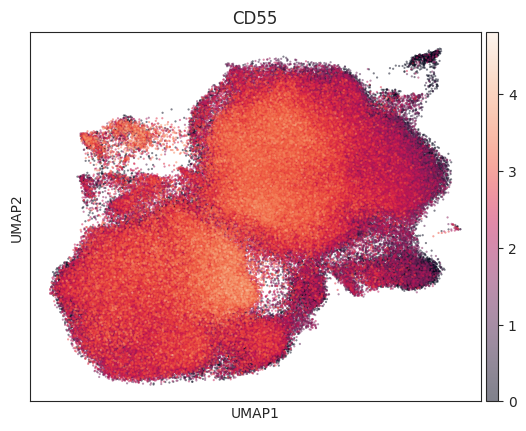

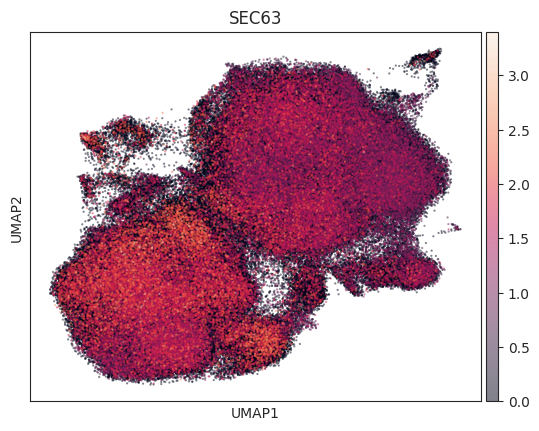

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


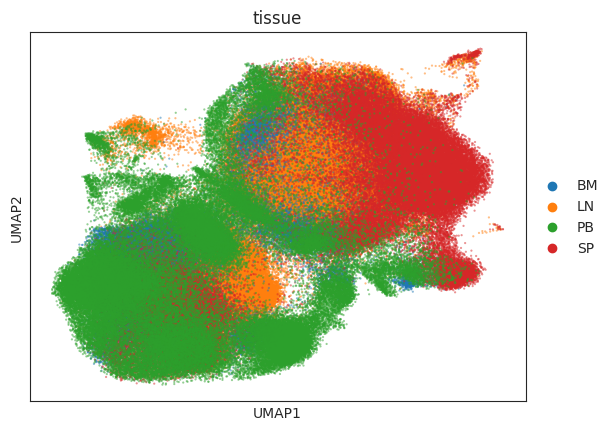

In [ ]:
sc.pl.umap(adata, color = 'hypermutated', size = 10, alpha = 0.5)
sc.pl.umap(adata, color = 'celltypist', size = 10, alpha = 0.7)

sc.pl.umap(adata, color = 'SOX5', size = 10, alpha = 0.5)

sc.pl.umap(adata, color = 'EZR', size = 10, alpha = 0.5)
sc.pl.umap(adata, color = 'CD55', size = 10, alpha = 0.5)

sc.pl.umap(adata, color = 'SEC63', size = 10, alpha = 0.5)

sc.pl.umap(adata, color = 'tissue', size = 10, alpha = 0.5)

In [ ]:
adata.obs.groupby('leiden').hypermutated.value_counts(normalize = True)


leiden  hypermutated
0       False           0.980663
        True            0.019337
1       False           0.990311
        True            0.009689
2       False           0.984696
        True            0.015304
3       False           0.964250
        True            0.035750
4       False           0.990749
        True            0.009251
5       False           0.956680
        True            0.043320
6       False           0.987208
        True            0.012792
7       False           0.955580
        True            0.044420
8       False           0.972222
        True            0.027778
9       False           0.960302
        True            0.039698
10      False           0.742112
        True            0.257888
11      False           0.971328
        True            0.028672
12      False           0.983835
        True            0.016165
13      False           0.910655
        True            0.089345
14      False           0.611032
        True          

In [ ]:
adata.obs.groupby('leiden').hypermutated.value_counts(normalize = False)

leiden  hypermutated
0       False           15874
        True              313
1       False           14923
        True              146
2       False           13962
        True              217
3       False           13567
        True              503
4       False           13815
        True              129
5       False           11572
        True              524
6       False            9338
        True              121
7       False            8691
        True              404
8       False            8575
        True              245
9       False            8273
        True              342
10      False            5410
        True             1880
11      False            6335
        True              187
12      False            5782
        True               95
13      False            2487
        True              244
14      False             853
        True              543
15      False            1331
        True               25
16      False      

In [ ]:
ad = adata[~adata.obs.celltypist.str.contains("Age")]

In [ ]:
sc.tl.rank_genes_groups(ad, groupby='hypermutated')

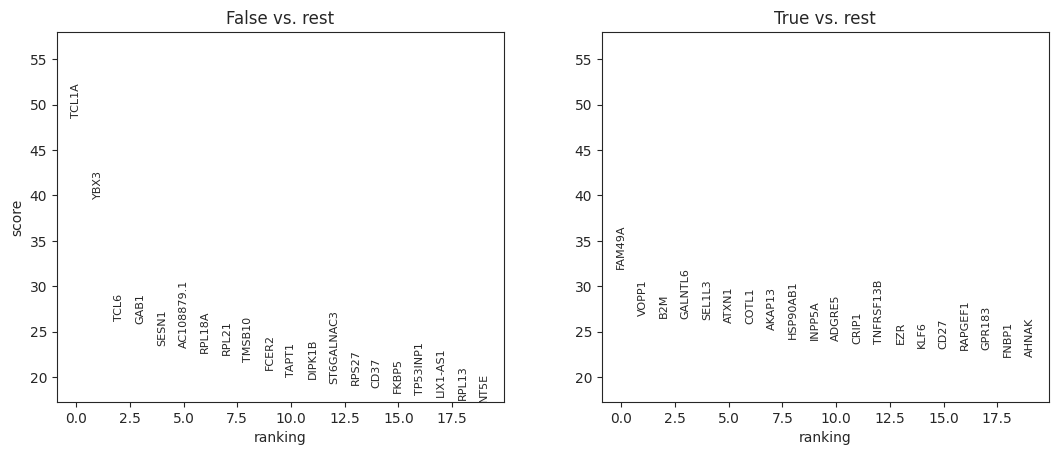

In [ ]:
sc.pl.rank_genes_groups(ad)

In [ ]:
ad

AnnData object with n_obs × n_vars = 141145 × 27218
    obs: 'donor', 'tissue', 'sample_uid', 'doublet_scores_counts', 'predicted_doublets_counts', 'doublet_scores_cellbender_counts', 'predicted_doublets_cellbender_counts', 'n_genes', 'n_counts', 'donor_tissue', '_scvi_batch', '_scvi_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'Immune_All_Low_predicted_labels', 'Immune_All_Low_conf_score', 'Immune_All_High_predicted_labels', 'Immune_All_High_conf_score', 'majority_voting_low_predicted_labels', 'majority_voting_low_over_clustering', 'majority_voting_low_majority_voting', 'majority_voting_low_conf_score', 'leiden', 'correlation_cycling', 'anticorrelation_cycling', 'corr_cycling', 'anticorr_cycling', 'cycling', 'Majority_Voting_Result', 'majority_voting_doublet', 'rare_or_bad_q_cell', 't_cell_score', 'myeloid_score', 'possible_b_cell', 'probable_hq_single_b_cell', 'probable_hq_s

<Axes: xlabel='v_mismatch', ylabel='Proportion'>

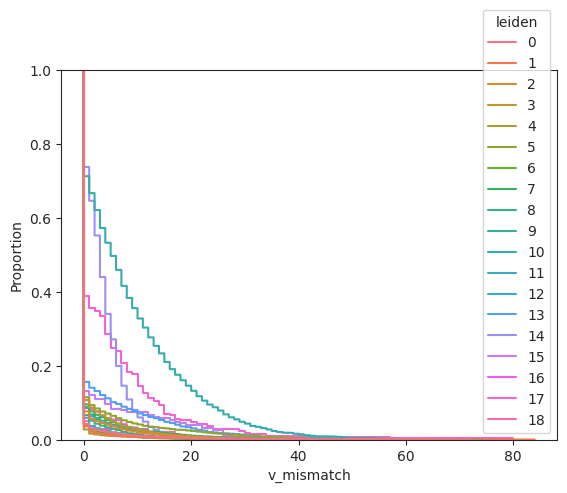

In [ ]:
sns.ecdfplot(data = adata.obs, x = 'v_mismatch', hue = 'leiden', complementary=True)